<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())
df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())


Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


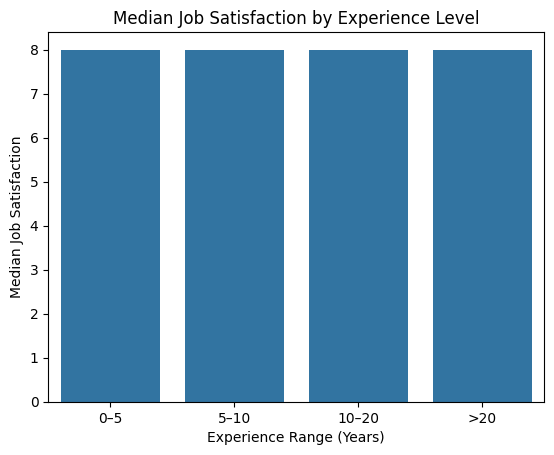

In [4]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean and convert YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Step 2: Create experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0–5', '5–10', '10–20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

# Step 3: Calculate median JobSat for each range
median_job_sat = df.groupby('ExperienceRange', observed=True)['JobSat'].median()

# Step 4: Visualize with a bar plot
sns.barplot(x=median_job_sat.index, y=median_job_sat.values)
plt.title('Median Job Satisfaction by Experience Level')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.show()




#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


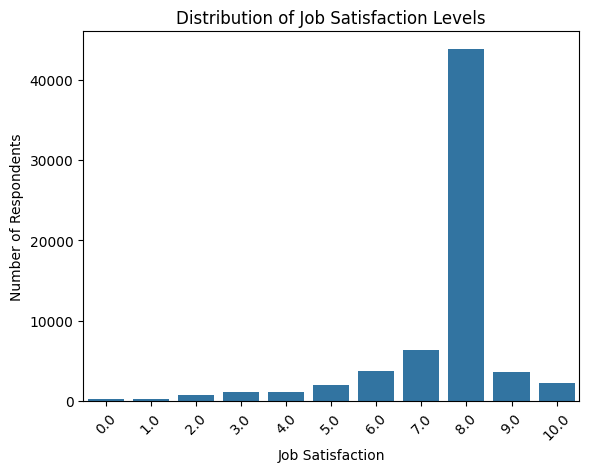

In [5]:
## Write your code here
sns.countplot(x='JobSat', data=df)
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


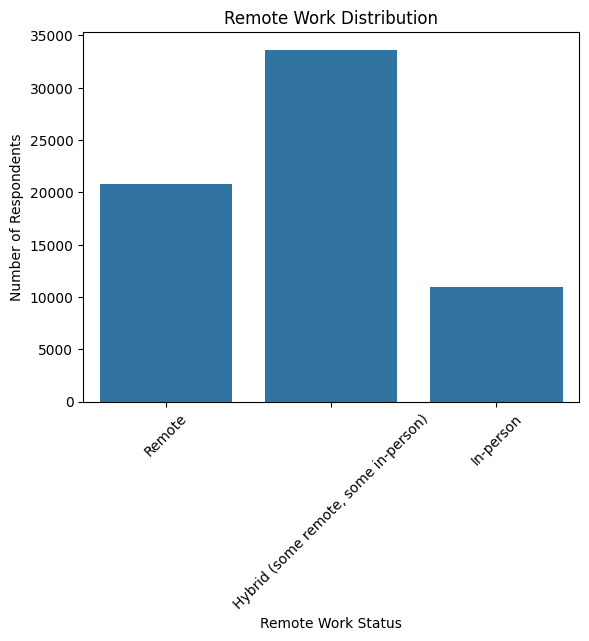

RemoteWork                                                                                 Hybrid (some remote, some in-person)  \
Employment                             MainBranch                                                                                 
Employed, full-time                    I am a developer by profession                                                     15295   
                                       I am learning to code                                                                 80   
                                       I am not primarily a developer, but I write cod...                                  1480   
                                       I code primarily as a hobby                                                           98   
                                       I used to be a developer by profession, but no ...                                   343   
...                                                                                                                         ...   
Student, part-time;Employed, part-time I used to be a developer by profession, but no ...                                     2   
Student, part-time;Retired             I am learning to code                                                                  1   
                                       I am not primarily a developer, but I write cod...                                     1   
                                       I code primarily as a hobby                                                            1   
                                       I used to be a developer by profession, but no ...                                     1   

RemoteWork                                                                                 In-person  \
Employment                             MainBranch                                                      
Employed, full-time                    I am a developer by profession                           7118   
                                       I am learning to code                                     182   
                                       I am not primarily a developer, but I write cod...        916   
                                       I code primarily as a hobby                               185   
                                       I used to be a developer by profession, but no ...        151   
...                                                                                              ...   
Student, part-time;Employed, part-time I used to be a developer by profession, but no ...          0   
Student, part-time;Retired             I am learning to code                                       0   
                                       I am not primarily a developer, but I write cod...          0   
                                       I code primarily as a hobby                                 0   
                                       I used to be a developer by profession, but no ...          0   

RemoteWork                                                                                 Remote  
Employment                             MainBranch                                                  
Employed, full-time                    I am a developer by profession                       12191  
                                       I am learning to code                                   62  
                                       I am not primarily a developer, but I write cod...     693  
                                       I code primarily as a hobby                             48  
                                       I used to be a developer by profession, but no ...     199  
...                                                                                           ...  
Student, part-time;Employed, part-time I used to be a developer by profession, but no ...       0  
Student, part-time;Retired             I am

In [6]:
## Write your code here

#Count plot of remote work distribution
sns.countplot(x='RemoteWork', data=df)
plt.title('Remote Work Distribution')
plt.xlabel('Remote Work Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()
#Cross-tabulate by employment type and job role
pd.crosstab([df['Employment'], df['MainBranch']], df['RemoteWork'])


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


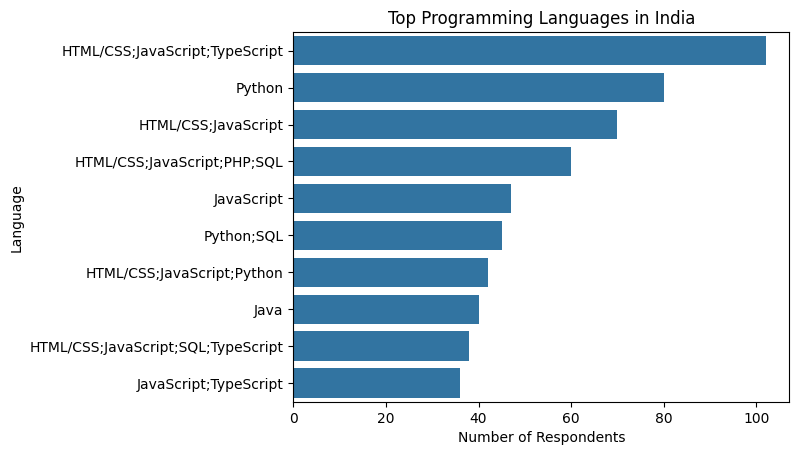

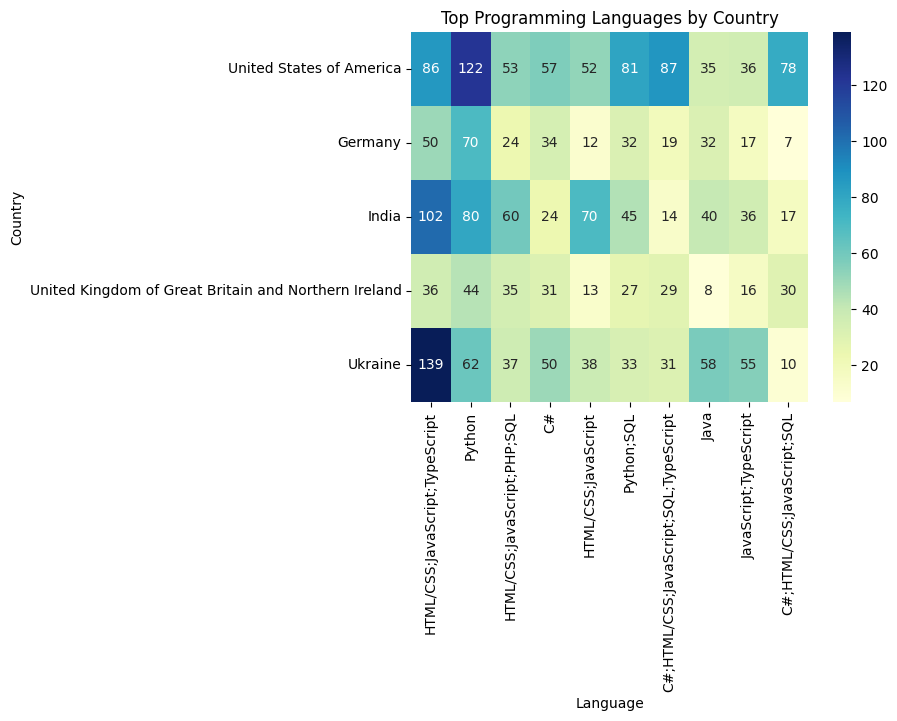

In [8]:
## Write your code here
#Split languages into individual entries
df['LanguageList'] = df['LanguageHaveWorkedWith'].str.split(',')
#Explode the list into separate rows
df_exploded = df.explode('LanguageList')
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()
#Filter by region (e.g., India)
df_india = df_exploded[df_exploded['Country'] == 'India']
top_languages_india = df_india['LanguageList'].value_counts().head(10)
#Bar plot for one region
sns.barplot(x=top_languages_india.values, y=top_languages_india.index)
plt.title('Top Programming Languages in India')
plt.xlabel('Number of Respondents')
plt.ylabel('Language')
plt.show()
#Heatmap for multiple regions
language_by_country = pd.crosstab(df_exploded['Country'], df_exploded['LanguageList'])
top_countries = language_by_country.sum(axis=1).sort_values(ascending=False).head(5).index
top_languages = language_by_country.sum(axis=0).sort_values(ascending=False).head(10).index

heatmap_data = language_by_country.loc[top_countries, top_languages]

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top Programming Languages by Country')
plt.xlabel('Language')
plt.ylabel('Country')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


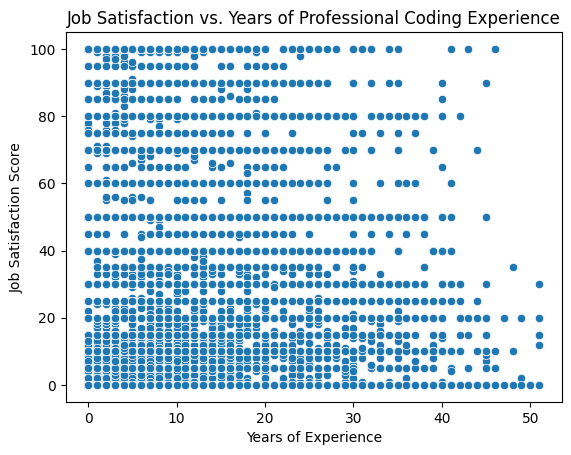

In [9]:
## Write your code here
#Clean YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
#Ensure JobSatPoints_1 is numeric
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')
#Create scatter plot
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df)
plt.title('Job Satisfaction vs. Years of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


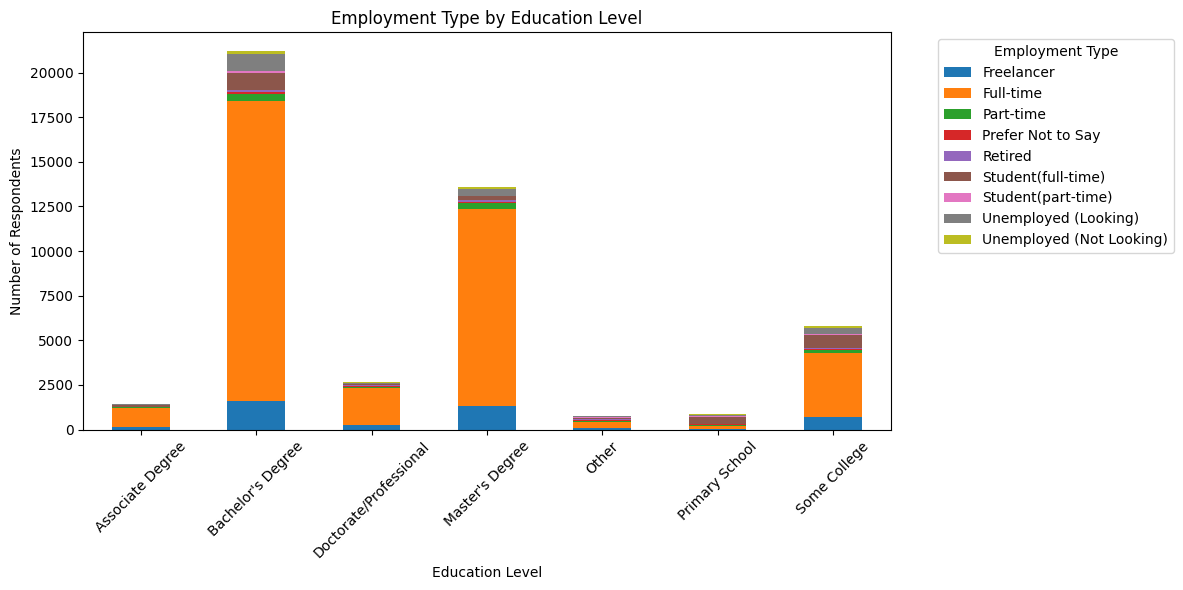

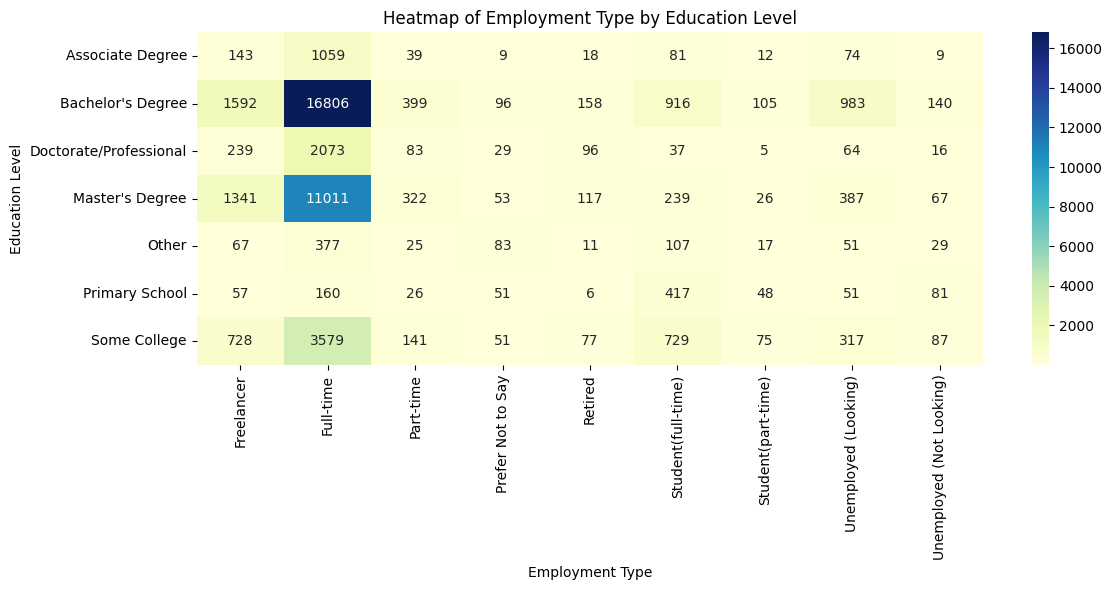

In [10]:
## Write your code here
education_map = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's Degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's Degree",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Doctorate/Professional",
    "Associate degree (A.A., A.S., etc.)": "Associate Degree",
    "Some college/university study without earning a degree": "Some College",
    "Secondary school (e.g. American high school, German Realschule)": "High School",
    "Primary/elementary school": "Primary School",
    "Something else": "Other"
}
df['EdLevelGrouped'] = df['EdLevel'].map(education_map)

employment_map = {
    'Employed, full-time': 'Full-time',
    'Employed, part-time': 'Part-time',
    'Independent contractor, freelancer, or self-employed': 'Freelancer',
    'Student, full-time': 'Student(full-time)',
    'Student, part-time': 'Student(part-time)',
    'Not employed, but looking for work': 'Unemployed (Looking)',
    'Not employed, and not looking for work': 'Unemployed (Not Looking)',
    'Retired': 'Retired',
    'I prefer not to say': 'Prefer Not to Say'
}
df['EmploymentGrouped'] = df['Employment'].map(employment_map)
edu_employment_ct = pd.crosstab(df['EdLevelGrouped'], df['EmploymentGrouped'])

edu_employment_ct.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Employment Type by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(edu_employment_ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Employment Type by Education Level')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [11]:
## Write your code here
df.to_csv('cleaned_survey_data.csv', index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
